# **Table of Contents**
* [Data Preprocessing](#section_a)
    * [Drop](#section_1)
    * [Convert](#section_2)
    * [Null treatment](#section_3)
    <br><br>
* [EDA](#section_b)
    * [Q 1](#section_4)
    * [Q 2](#section_5)

In [1]:
import numpy                as np
import pandas               as pd
import matplotlib.pyplot    as plt
import seaborn              as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('datasets/FIFA.csv')

df.sample(3)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause
14213,231522,A. Stadler,30,https://cdn.sofifa.org/players/4/19/231522.png,United States,https://cdn.sofifa.org/flags/95.png,61,61,Dalkurd FF,https://cdn.sofifa.org/teams/2/light/113876.png,...,High/ High,Lean,ST,13.0,22-Mar-17,NaN,2018,5'10,157lbs,€300K
16542,232113,C. Gallego,29,https://cdn.sofifa.org/players/4/19/232113.png,Colombia,https://cdn.sofifa.org/flags/56.png,57,57,Itagüí Leones FC,https://cdn.sofifa.org/teams/2/light/112970.png,...,Medium/ Medium,Normal,LB,4.0,09-Jul-18,NaN,2021,5'9,157lbs,€108K
3114,228821,Z. Machach,22,https://cdn.sofifa.org/players/4/19/228821.png,France,https://cdn.sofifa.org/flags/18.png,73,80,Carpi,https://cdn.sofifa.org/teams/2/light/112409.png,...,Medium/ Medium,Normal,CAM,27.0,NaN,Napoli,30-Jun-19,6'0,170lbs,NaN


<a id='section_a'></a>
# **1. Data Pre-Processing**

<a id='section_1'></a>
## **Drop**

In [3]:
df.drop  ( [    'Photo', 'Nationality', 'Flag','Club Logo', 'Preferred Foot', 
                'Skill Moves' , 'Body Type', 'Jersey Number', 'Weak Foot', 
                'Work Rate', 'Loaned From', 'Club','Joined' 
           ] , axis=1 , inplace=True )

<a id='section_2'></a>
## **Convert**

In [4]:
df['Value']  =  [ 1000000*float(i.strip('M').strip('€'))    
                  if 'M' in i    
                  else  1000*float(i.strip('K').strip('€'))    
                  for i in df['Value']
                ]

In [5]:
df['Wage']   =  [ 1000000*float(i.strip('M').strip('€'))  
                  if 'M' in i 
                  else 1000*float(i.strip('K').strip('€')) 
                  for i in df['Wage']
                ]

In [6]:
l=[]

for i in df['Release Clause']:
    if isinstance(i,float)!=True:
        if 'M' in i:
            l.append(1000000*float(i.strip('M').strip('€')))
        elif 'K' in i:
            l.append(1000*float(i.strip('K').strip('€')))
    else:
         l.append(i)
            
df['Release Clause']=l

In [7]:
df['Height']  =  [ i 
                  if isinstance(i,float)==True 
                  else ((float(i.split("'")[0])*12) + float(i.split("'")[1]))  
                  for i in df['Height']
                 ]

In [8]:
df['Weight']  =  [ i 
                   if isinstance(i,float)==True 
                   else float(i.strip('lbs')) 
                   for i in df['Weight']
                 ]

In [9]:
df['Contract Valid Until']  =   pd.to_datetime ( df['Contract Valid Until'] )

<a id='section_3'></a>
## **Null treatment**

In [10]:
df.isnull().sum()

ID                             0
Name                           0
Age                            0
Overall                        0
Potential                      0
Value                          0
Wage                           0
International Reputation      48
Position                      60
Contract Valid Until         289
Height                        48
Weight                        48
Release Clause              1564
dtype: int64

In [11]:
df['International Reputation'].fillna ( df['International Reputation'].mean()  ,  inplace=True)

df['Height']                  .fillna ( df['Height'].mean()        ,   inplace=True )

df['Weight']                  .fillna ( df['Weight'].mean()        ,   inplace=True )

df['Position']                .fillna ( df['Position'].mode()[0]   ,   inplace=True )

In [12]:
df.isnull().sum()

ID                             0
Name                           0
Age                            0
Overall                        0
Potential                      0
Value                          0
Wage                           0
International Reputation       0
Position                       0
Contract Valid Until         289
Height                         0
Weight                         0
Release Clause              1564
dtype: int64

<a id='section_b'></a>
# **2. EDA**

<a id='section_4'></a>
## **Q 1** 

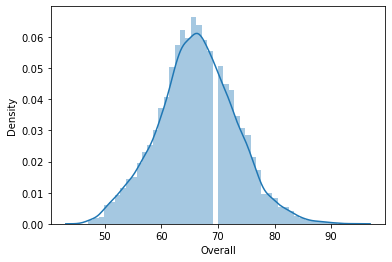

In [13]:
sns.distplot ( df['Overall'] ) ;

In [14]:
print  (df['Overall'].median())
print  (df['Overall'].mode()[0])

66.0
66


In [15]:
print  (df['Overall'].max())
print  (df['Overall'].min())

94
46


<a id='section_5'></a>
## **Q 2**
### Table

In [17]:
top10 = df [ df.sort_values('Overall',ascending=False) ['Contract Valid Until']=='2020'] . head(10)

In [18]:
top10.head(10)

,ID,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Contract Valid Until,Height,Weight,Release Clause
3,193080,De Gea,27,91,93,72000000.0,260000.0,4.0,GK,2020-01-01,76.0,168.0,138600000.0
5,183277,E. Hazard,27,91,91,93000000.0,340000.0,4.0,LF,2020-01-01,68.0,163.0,172100000.0
6,177003,L. Modrić,32,91,91,67000000.0,420000.0,4.0,RCM,2020-01-01,68.0,146.0,137400000.0
8,155862,Sergio Ramos,32,91,91,51000000.0,380000.0,4.0,RCB,2020-01-01,72.0,181.0,104600000.0
13,168542,David Silva,32,90,90,60000000.0,285000.0,4.0,LCM,2020-01-01,68.0,148.0,111000000.0
21,179813,E. Cavani,31,89,89,60000000.0,200000.0,4.0,LS,2020-01-01,73.0,170.0,111000000.0
24,138956,G. Chiellini,33,89,89,27000000.0,215000.0,4.0,LCB,2020-01-01,74.0,187.0,44600000.0
31,190460,C. Eriksen,26,88,91,73500000.0,205000.0,3.0,CAM,2020-01-01,71.0,168.0,141500000.0
39,164240,Thiago Silva,33,88,88,24000000.0,165000.0,4.0,RCB,2020-01-01,72.0,181.0,44400000.0
46,193041,K. Navas,31,87,87,30500000.0,195000.0,3.0,GK,2020-01-01,73.0,176.0,62500000.0


**Average wage**

In [19]:
top10['Wage'].mean()

266500.0

**Average age**

In [20]:
top10['Age'].mean()

30.4

**Correlation between the Overall rating and Value**

In [21]:
top10 [['Overall','Value']] .corr()

,Overall,Value
Overall,1.000000,0.612239
Value,0.612239,1.000000
